<a href="https://colab.research.google.com/github/Hojjat77-kaz/learning_cnn/blob/main/cnn_bn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

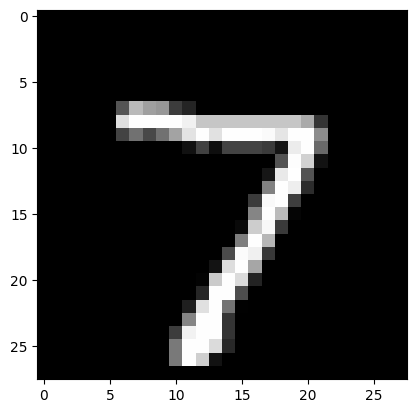

In [5]:
plt.imshow(x_test[0], cmap='gray')

# preprocess

In [6]:
x_train = x_train.reshape(-1,28, 28, 1).astype('float32')/ 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/ 255

In [7]:
x_train.shape

(60000, 28, 28, 1)

# Model Definition

In [20]:
model = keras.Sequential()
# conv2D + BN + MaxPool
model.add(keras.layers.Conv2D(32, (3,3), input_shape= (28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# conv2D + BN + MaxPool
model.add(keras.layers.Conv2D(32, (3,3), input_shape= (28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# connectly layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units= 128, activation='relu'))
model.add(keras.layers.Dense(units= 10, activation='softmax'))

#compile
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [21]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,642 (443.91 KB)

 Trainable params: 113,514 (443.41 KB)

 Non-trainable params: 128 (512.00 B)

In [22]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8418 - loss: 0.5135 - val_accuracy: 0.2581 - val_loss: 2.3608
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9820 - loss: 0.0590 - val_accuracy: 0.9049 - val_loss: 0.3003
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9880 - loss: 0.0382 - val_accuracy: 0.9814 - val_loss: 0.0552
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9884 - val_loss: 0.0337
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.9884 - val_loss: 0.0360
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9890 - val_loss: 0.0356
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy: 0.9898 - val_loss: 0.0317
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9973 - loss: 0.0096 - val_accuracy: 0

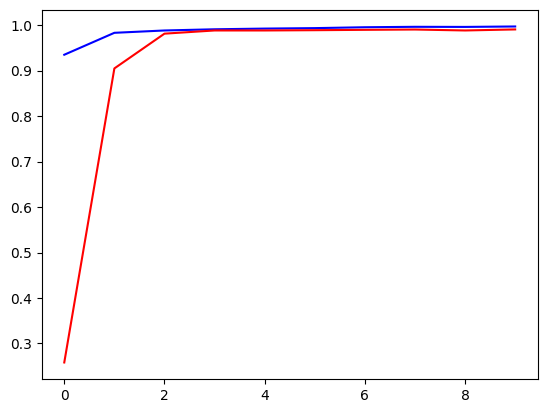

In [23]:
plt.plot(hist.history['accuracy'], color= 'blue')
plt.plot(hist.history['val_accuracy'], color= 'red')